In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from tensorflow.keras.datasets import mnist

In [39]:
(X_train,y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


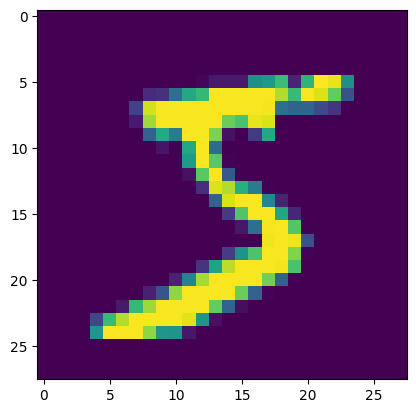

In [40]:
plt.imshow(X_train[0])

In [41]:
y_train[0]

5

In [42]:
eights = X_train[y_train==8]

In [43]:
eights.shape

(5851, 28, 28)

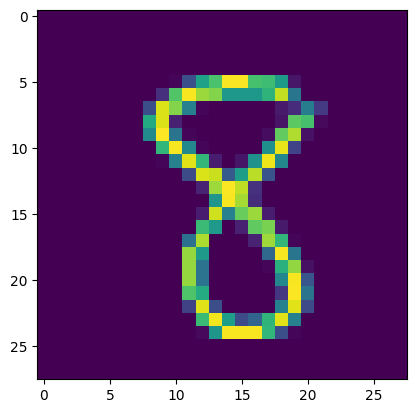

In [44]:
plt.imshow(eights[10])

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [47]:
disc = Sequential()
disc.add(Flatten(input_shape=[28,28]))
disc.add(Dense(150,activation='relu'))
disc.add(Dense(100,activation='relu'))
disc.add(Dense(50,activation ='relu'))
disc.add(Dense(1,activation='sigmoid'))

disc.compile(loss ='binary_crossentropy',optimizer='adam')

In [48]:
size = 100
gen = Sequential()
gen.add(Dense(50,activation='relu',input_shape=[size]))
gen.add(Dense(100,activation='relu'))
gen.add(Dense(150,activation='relu'))
gen.add(Dense(784,activation='relu'))
gen.add(Reshape([28,28]))

In [49]:
GAN = Sequential([gen,disc])

In [50]:
disc.trainable = False

In [51]:
GAN.compile(loss = 'binary_crossentropy',optimizer='adam')

In [52]:
batch_size = 64

In [53]:
my_data = eights

In [56]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [59]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [86]:
epochs = 50

In [61]:
GAN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 28, 28)            143684    
                                                                 
 sequential_5 (Sequential)   (None, 1)                 137951    
                                                                 
Total params: 281,635
Trainable params: 143,684
Non-trainable params: 137,951
_________________________________________________________________


In [87]:
gen,disc = GAN.layers

for epoch in range(epochs):
  print(f"Currently on Epoch{epoch+1}")
  i = 0

  for X_batch in dataset:

    i = i+1
    if i%100 == 0:
       print(f"\tCurrently on Batch number{i} of (len(my_data)//batch_size)")


    #DISCRIMINATOR Training

    noise = tf.random.normal(shape=[batch_size,size])
    gen_images = gen(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

    y1 = tf.constant([[0.0]]* batch_size + [[1.0]] * batch_size)
    disc.trainable = True

    disc.train_on_batch(X_fake_vs_real,y1)


    #GENERATOR training
    noise = tf.random.normal(shape=[batch_size,size])
    y2 = tf.constant([[1.0]]*batch_size)
    disc.trainable = False

    GAN.train_on_batch(noise,y2)

Currently on Epoch1
Currently on Epoch2
Currently on Epoch3
Currently on Epoch4
Currently on Epoch5
Currently on Epoch6
Currently on Epoch7
Currently on Epoch8
Currently on Epoch9
Currently on Epoch10
Currently on Epoch11
Currently on Epoch12
Currently on Epoch13
Currently on Epoch14
Currently on Epoch15
Currently on Epoch16
Currently on Epoch17
Currently on Epoch18
Currently on Epoch19
Currently on Epoch20
Currently on Epoch21
Currently on Epoch22
Currently on Epoch23
Currently on Epoch24
Currently on Epoch25
Currently on Epoch26
Currently on Epoch27
Currently on Epoch28
Currently on Epoch29
Currently on Epoch30
Currently on Epoch31
Currently on Epoch32
Currently on Epoch33
Currently on Epoch34
Currently on Epoch35
Currently on Epoch36
Currently on Epoch37
Currently on Epoch38
Currently on Epoch39
Currently on Epoch40
Currently on Epoch41
Currently on Epoch42
Currently on Epoch43
Currently on Epoch44
Currently on Epoch45
Currently on Epoch46
Currently on Epoch47
Currently on Epoch48
C

In [80]:
noise = tf.random.normal(shape = [10, size])


In [81]:
noise.shape

TensorShape([10, 100])

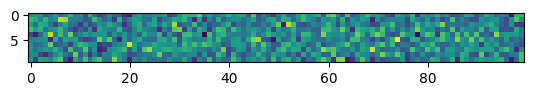

In [82]:
plt.imshow(noise)

In [88]:
images = gen(noise)

In [89]:
images.shape

TensorShape([64, 28, 28])

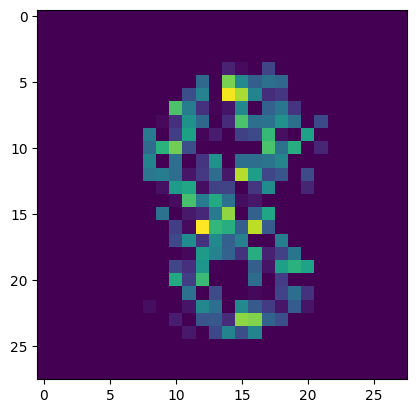

In [90]:
plt.imshow(images[1])